# Exploratory Data Analysis
Will look at:
- red light camera data
    - temporal 
- crash data
     - by type
     - by 

In [46]:
import pandas as pd
from datetime import datetime
from modules.myfuncs import *
import warnings
import numpy as np
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
# import dask
# import dask.dataframe as dd

warnings.filterwarnings('ignore')

In [47]:
# file rlc2.db can be downloaded from 
# https://drive.google.com/file/d/1qIwCtdU1G7FtK4fCaB5mwa4QUGQNesKa/view?usp=sharing

conn = create_connection('database/rlc2.db')  # function from myfuncs file
c = conn.cursor()

sqlite3 version: 2.6.0
connected to database/rlc2.db


In [48]:
# available tables
sql_fetch_tables(c, conn)

[('intersection_chars',),
 ('cam_locations',),
 ('cam_startend',),
 ('daily_violations',),
 ('all_crashes',),
 ('hourly_congestion',),
 ('hourly_weather',),
 ('region_data',),
 ('intersection_cams',),
 ('signal_crashes',),
 ('all_hours',),
 ('int_startend',)]

In [49]:
regions_df = pd.read_sql_query("SELECT * FROM region_data", conn)
weather_df = pd.read_sql_query("SELECT * FROM hourly_weather", conn)
crash_df = pd.read_sql_query("SELECT * FROM signal_crashes", conn)
signal_df = pd.read_sql_query("SELECT * FROM daily_violations", conn)

In [50]:
# # minutes
# big_df = pd.read_sql_query('''SELECT * 
#                               FROM hourly_congestion c
#                               LEFT JOIN hourly_weather wx
#                                   ON c.year=wx.year
#                                      AND c.month=wx.month
#                                      AND c.day=wx.day
#                                      AND c.hour=wx.hour
#                               LEFT JOIN signal_crashes cr
#                                  ON c.year=cr.year
#                                      AND c.month=cr.month
#                                      AND c.day=cr.day
#                                      AND c.hour=cr.hour
#                                      AND c.region_id=cr.region_id
#                               WHERE c.year BETWEEN 2016 AND 2020

#                            ''', conn)


# big_df.head()

# Signal Violations EDA

We will look at how the number of violations are affected by:
- day of week
- year
- month

In [51]:
signal_df = signal_df[signal_df['year']>2015]

   weekday  violations
0        0      370423
1        1      371238
2        2      377325
3        3      394487
4        4      432064


[]

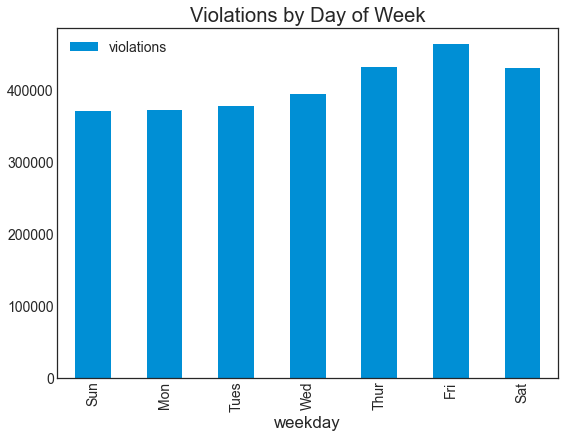

In [52]:

plt.style.use('seaborn-white')


# Weekday plot
df_weekday = signal_df.groupby(['weekday'])['violations'].sum().reset_index()
print(df_weekday.head())


ax = df_weekday.plot.bar('weekday', 'violations', figsize=[8,6])
labels = ['Sun', 'Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat']
ax.set_xticklabels(labels)
ax.set_title("Violations by Day of Week")
plt.plot()

Does the month of the year have any effect on violations?
Note: Not all months have same days.  I could normalize if needed.

In [53]:
signal_df.columns

Index(['intersection', 'camera_id', 'address', 'violation_date', 'violations',
       'latitude', 'longitude', 'month', 'day', 'weekday', 'year'],
      dtype='object')

   month  violations
0      1    4.709517
1      2    5.076703
2      3    5.413907
3      4    5.494941
4      5    6.114545


[]

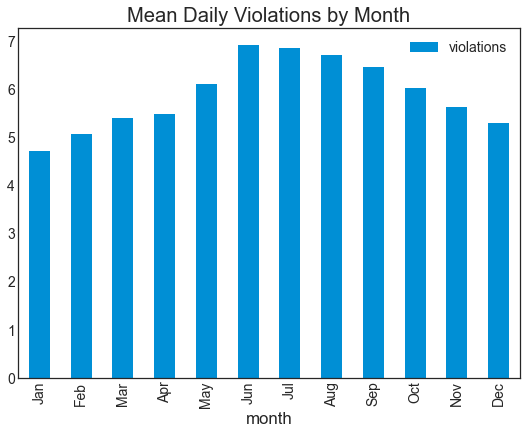

In [54]:
# Month plot
df_month = signal_df.groupby(['month'])['violations'].mean().reset_index()
print(df_month.head())

ax2 = df_month.plot.bar('month', 'violations', figsize=[8,6])
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax2.set_xticklabels(labels)
ax2.set_title("Mean Daily Violations by Month")
plt.plot()

Did the violations change by year?

Text(0.5, 1.0, 'Violations by Year')

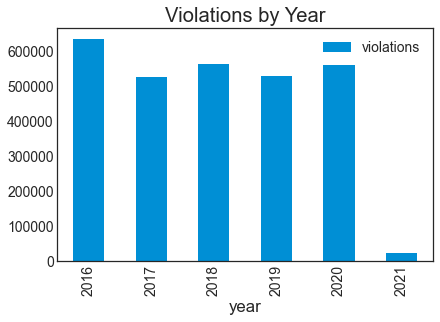

In [55]:
# Year plot
df_year = signal_df.groupby(['year'])['violations'].sum().reset_index()

ax4 = df_year.plot.bar('year', 'violations')
ax4.set_title("Violations by Year")

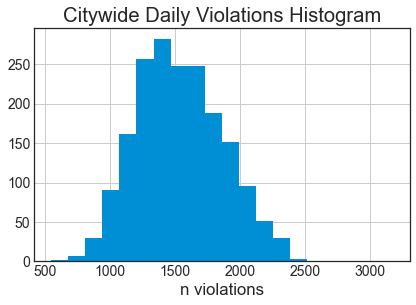

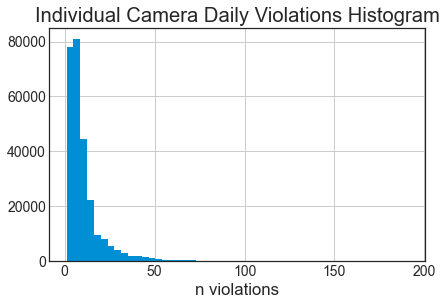

In [56]:
# All violations per day
signal_df.groupby(['year', 'month', 'day']).sum().reset_index()['violations'].hist(bins=20)
plt.title('Citywide Daily Violations Histogram')
plt.xlabel('n violations')
plt.show()

# Individual camera violations per day
signal_df.groupby(['year', 'month', 'day', 'intersection']).sum().reset_index()['violations'].hist(bins=50)
plt.title('Individual Camera Daily Violations Histogram')
plt.xlabel('n violations')
plt.show()


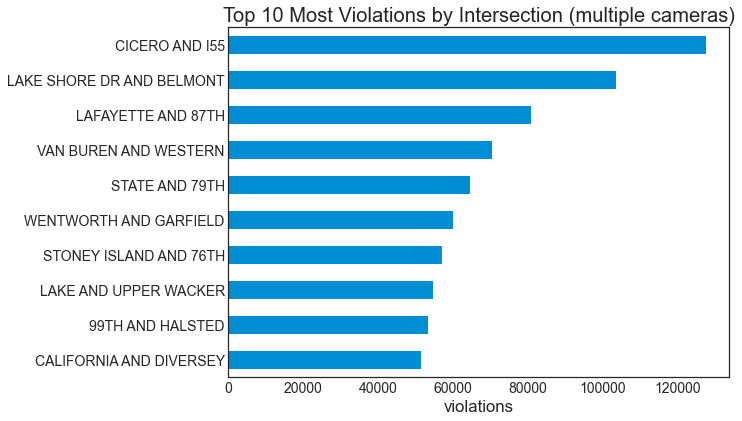

In [57]:
# top 10 plot
df_top10 = signal_df.groupby(['intersection'])['violations'].sum().reset_index()
df_top10 = df_top10.sort_values(['violations'], ascending=True).tail(10)
ax3 = df_top10.plot.barh(y='violations', x='intersection', figsize=[8,6])

ax3.set_title("Top 10 Most Violations by Intersection (multiple cameras)")
ax3.set_ylabel('') # do this post plot, you have to talk to y, even in a barh
ax3.set_xlabel('violations')
ax3.get_legend().remove()

plt.show()# box plot all cameras

What does the boxplot look like for all the cameras 

<Figure size 720x576 with 0 Axes>

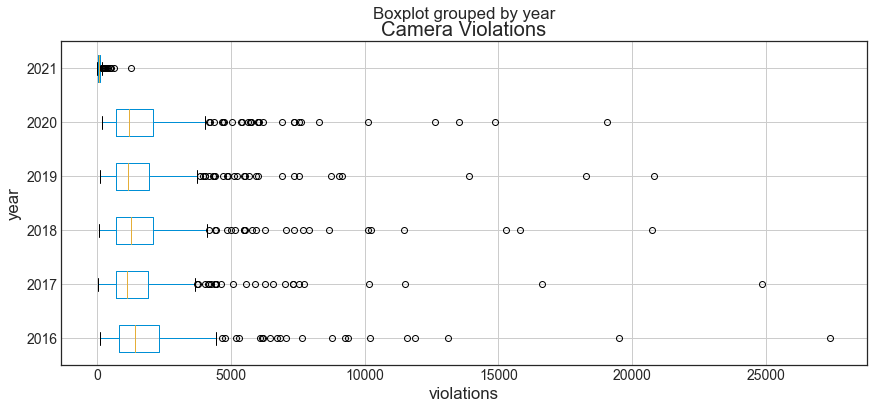

In [58]:
# plotly is not supported with boxplot

plt.figure(figsize=[10,8])
#signal_df.groupby(['camera_id'])['violations'].sum().reset_index().boxplot('violations')
#signaldf.groupby(['year', 'camera_id']).sum().reset_index().boxplot(by='year')

#signal_df.groupbyboxplot(column=['SepalLength'], by='Name', ax=ax)
signal_df.groupby(['year', 'camera_id']).sum().reset_index()[['year', 'violations']].boxplot(by='year', vert=False, figsize=[14,6])
plt.xlabel('violations')
plt.ylabel('year')
plt.title('Camera Violations')
plt.show()

# change back to plotly


In [59]:
# basic pd info
print('All Data')
print(signal_df['violations'].describe())

print('\n'*2 + 'Weekday Grouped Violations')
print(df_weekday['violations'].describe())

print('\n'*2 + 'Monthly Grouped Violations')
print(df_month['violations'].describe())


All Data
count    480708.000000
mean          5.903370
std           7.739866
min           1.000000
25%           2.000000
50%           4.000000
75%           7.000000
max         186.000000
Name: violations, dtype: float64


Weekday Grouped Violations
count         7.000000
mean     405399.571429
std       36241.195620
min      370423.000000
25%      374281.500000
50%      394487.000000
75%      430775.500000
max      462773.000000
Name: violations, dtype: float64


Monthly Grouped Violations
count    12.000000
mean      5.895421
std       0.735357
min       4.709517
25%       5.385683
50%       5.831744
75%       6.526782
max       6.929983
Name: violations, dtype: float64


What does this look like on a map?  Does it make sense?

In [60]:
#!pip install plotly express
#!jupyter trust --reset
#!conda clean --all -y
#!jupyter labextension update --all
#!conda install -c plotly plotly
#!conda install -c plotly plotly_express -y


#!conda update --all -c plotly -c defaults -c conda-forge -y


In [61]:
import plotly.express as px
from modules.mb import * 
import plotly
plotly.offline.init_notebook_mode(connected=True)
# mb contains token


#px.set_mapbox_access_token(open(".mapbox_token").read())


df_plot = signal_df.groupby(['intersection', 'latitude', 'longitude'], as_index=True)['violations'].sum().reset_index()
#print(df_plot.head())
df_plot['lat'] = df_plot['latitude'].apply(lambda x: '{:.2f}'.format(x))
df_plot['long'] = df_plot['longitude'].apply(lambda x: '{:.2f}'.format(x))



# fig = px.scatter_geo(results_df.groupby('camera_id').sum(), locations="iso_alpha",
#                      color="violations", # which column to use to set the color of markers
#                      #hover_name="country", # column added to hover information
#                      size="violations", # size of markers
#                      projection="natural earth")

#px.scatter_mapbox?
fig = px.scatter_mapbox(df_plot, 
                        lat="latitude", 
                        lon="longitude", 
                        color="violations",
                        hover_name='intersection',
                        size='violations',
                        #label=['lat','long','violations'],
                        color_continuous_scale='Rainbow', 
                        #range_color=[range_min, range],
                        #center={'lat':41.975605, 'lon': -87.731670},
                        zoom=9.5,
                        opacity=0.6,
                        height=700,
                        hover_data={'intersection':False, 'lat':False, 'long':':.2f', 'latitude':False} ,
                       )

#fig.update_layout(mapbox_style="stamen-toner", height=600) 
#fig.update_layout (textposition='top left', textfont_size=40)
fig.update_layout(mapbox_style="open-street-map", height=800)

fig.show()


If I set it up with animation, does it add any value?  (year, month, weekday)

In [62]:
import plotly.express as px



df_plot = signal_df.groupby(['intersection', 'latitude', 'longitude', 'month'])['violations'].sum().reset_index()
#weekday_dfs = []
#for i in range(7):
#    weekday_dfs.append(df_plot = results_df[results_df['weekday']==i])


# fig = px.scatter_geo(results_df.groupby('camera_id').sum(), locations="iso_alpha",
#                      color="violations", # which column to use to set the color of markers
#                      #hover_name="country", # column added to hover information
#                      size="violations", # size of markers
#                      projection="natural earth")

#px.scatter_mapbox?

fig = px.scatter_mapbox(df_plot, 
                        lat="latitude", 
                        lon="longitude", 
                        color="violations",
                        #text='address',
                        animation_frame='month',
                        size='violations',
                        hover_name='intersection',
                        labels=['violations', 'latitude', 'longitude'],
                        color_continuous_scale='Rainbow', 
                        #range_color=[1000, 20000],
                        #center={'lat':41.975605, 'lon': -87.731670},
                        zoom=9.5,
                        opacity=0.7,
                        range_color=(0,1.2e4),
                        
                       )
#fig.update_layout(mapbox_style="stamen-toner")
fig.update_layout(mapbox_style="open-street-map", height=800)

fig.show()

In [63]:
weather_df['precip'] = weather_df['snow_1h'] + weather_df['rain_1h']


In [64]:
weather_df.columns
wx_daily = weather_df.groupby(['year', 'month', 'day']).agg({'temp':'max', 'precip':'sum'})

wx_map = pd.merge(signal_df, wx_daily, how='left', on=['year', 'month', 'day'])
wx_map = wx_map[wx_map['year'] < 2021]
wx_map = wx_map[wx_map['temp'].notna()]

wx_map['temp'] = wx_map['temp'].apply(lambda x: (x-273.15) //5 * 5)
wx_map['temp'] = wx_map['temp'].astype(int)


In [65]:
import plotly.express as px



df_plot = wx_map.groupby(['intersection', 'latitude', 'longitude', 'temp'])['violations'].mean().reset_index()
#weekday_dfs = []
#for i in range(7):
#    weekday_dfs.append(df_plot = results_df[results_df['weekday']==i])


# fig = px.scatter_geo(results_df.groupby('camera_id').sum(), locations="iso_alpha",
#                      color="violations", # which column to use to set the color of markers
#                      #hover_name="country", # column added to hover information
#                      size="violations", # size of markers
#                      projection="natural earth")

#px.scatter_mapbox?

fig = px.scatter_mapbox(df_plot, 
                        lat="latitude", 
                        lon="longitude", 
                        color="violations",
                        #text='address',
                        animation_frame='temp',
                        size='violations',
                        hover_name='intersection',
                        labels=['violations', 'latitude', 'longitude'],
                        color_continuous_scale='Rainbow', 
                        #range_color=[1000, 20000],
                        #center={'lat':41.975605, 'lon': -87.731670},
                        zoom=9.5,
                        opacity=0.7,
                        range_color=(0,35),
                        
                       )
#fig.update_layout(mapbox_style="stamen-toner")
fig.update_layout(mapbox_style="open-street-map", height=800)

fig.show()

How about a heat map of total violations to show the areas of most violations

In [66]:
#px.density_mapbox?
crash_df['injuries_total'].isna().sum()
crash_df = crash_df[crash_df['injuries_total'].notnull()]
crash_df['injuries_total'] = crash_df['injuries_total'].astype(int)
crash_df[['latitude', 'longitude']] = crash_df[['latitude', 'longitude']].astype(float)


In [67]:
crash_df.columns

Index(['crash_record_id', 'rd_no', 'crash_date', 'posted_speed_limit',
       'traffic_control_device', 'device_condition', 'weather_condition',
       'lighting_condition', 'first_crash_type', 'trafficway_type',
       'alignment', 'roadway_surface_cond', 'road_defect', 'report_type',
       'crash_type', 'damage', 'prim_contributory_cause',
       'sec_contributory_cause', 'street_no', 'street_direction',
       'street_name', 'beat_of_occurrence', 'num_units', 'most_severe_injury',
       'injuries_total', 'injuries_fatal', 'injuries_incapacitating',
       'injuries_non_incapacitating', 'injuries_reported_not_evident',
       'injuries_no_indication', 'injuries_unknown', 'crash_hour',
       'crash_day_of_week', 'crash_month', 'latitude', 'longitude', 'lane_cnt',
       'intersection_related_i', 'hit_and_run_i', 'crash_date_est_i',
       'work_zone_i', 'work_zone_type', 'workers_present_i', 'intersection',
       'year', 'month', 'day', 'hour', 'region_id', 'time', 'weekday'],
   

In [68]:
#df_plot.rename({"crash_record_id": "crashes"}, axis=1)
df_plot.head()

,intersection,latitude,longitude,temp,violations
0,111TH AND HALSTED,41.692362,-87.642423,-20,3.500000
1,111TH AND HALSTED,41.692362,-87.642423,-15,5.400000
2,111TH AND HALSTED,41.692362,-87.642423,-10,5.000000
3,111TH AND HALSTED,41.692362,-87.642423,-5,4.800000
4,111TH AND HALSTED,41.692362,-87.642423,0,4.962162


In [71]:
df_plot = crash_df.groupby(['intersection'])[['injuries_total', 'latitude', 'longitude', 'crash_record_id']] \
                        .agg({'latitude':'mean', 'longitude':'mean', 'injuries_total':'sum', 'crash_record_id':'count'}).reset_index()

#df_plot = df_plot.rename({"crash_record_id": "crashes"}, axis=1)

fig = px.scatter_mapbox(df_plot, 
                        lat="latitude", 
                        lon="longitude", 
                        color="crash_record_id",
                        #text='address',
                        size='crash_record_id',
                        hover_name='intersection',
                        labels=['crash_record_id', 'latitude', 'longitude'],
                        color_continuous_scale='Rainbow', 
                        #range_color=[1000, 20000],
                        #center={'lat':41.975605, 'lon': -87.731670},
                        zoom=9.5,
                        opacity=0.7,
                        range_color=(20,120),
                        
                       )
#fig.update_layout(mapbox_style="stamen-toner")
fig.update_layout(mapbox_style="open-street-map", height=800)

fig.show()

### Did the number of active cameras change over time?

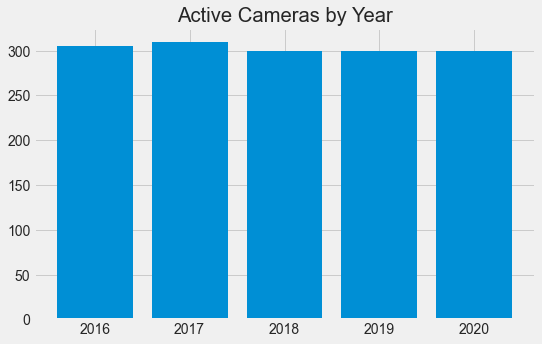

In [73]:
# how many rlc do we have by year.  Let's find out when they were OFF
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')

#print(results_df.groupby(['camera_id', 'year']).count().reset_index())
# how many in 2017?
year_cams = []
for year in range(2016, 2021):
    year_cams.append([year, len(signal_df[signal_df['year']==year].groupby('camera_id').count().reset_index())])
year_cams = np.array(year_cams)

plt.figure(figsize=[8,5])
plt.bar(year_cams[:,0], year_cams[:,1])
plt.title("Active Cameras by Year")
plt.show()

What about if we looked at a more granular level.  Let's go by month.  Look for big swings.

#### How does this compare to the number of violations during that time

In [74]:
signal_df["violation_date"] = pd.to_datetime(signal_df["violation_date"])



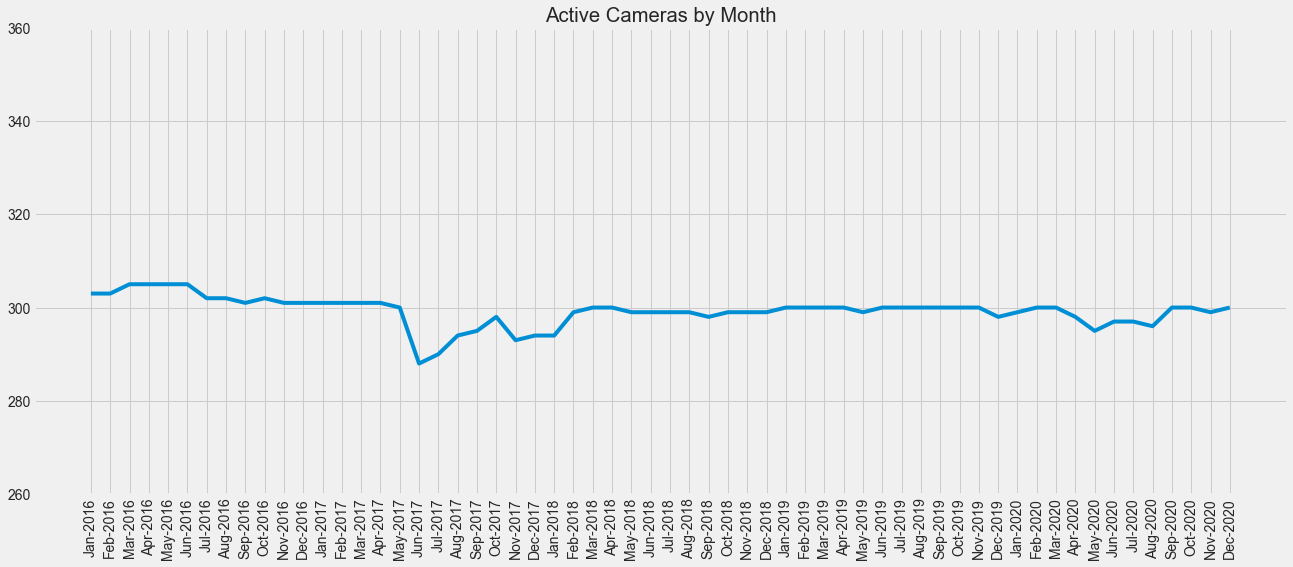

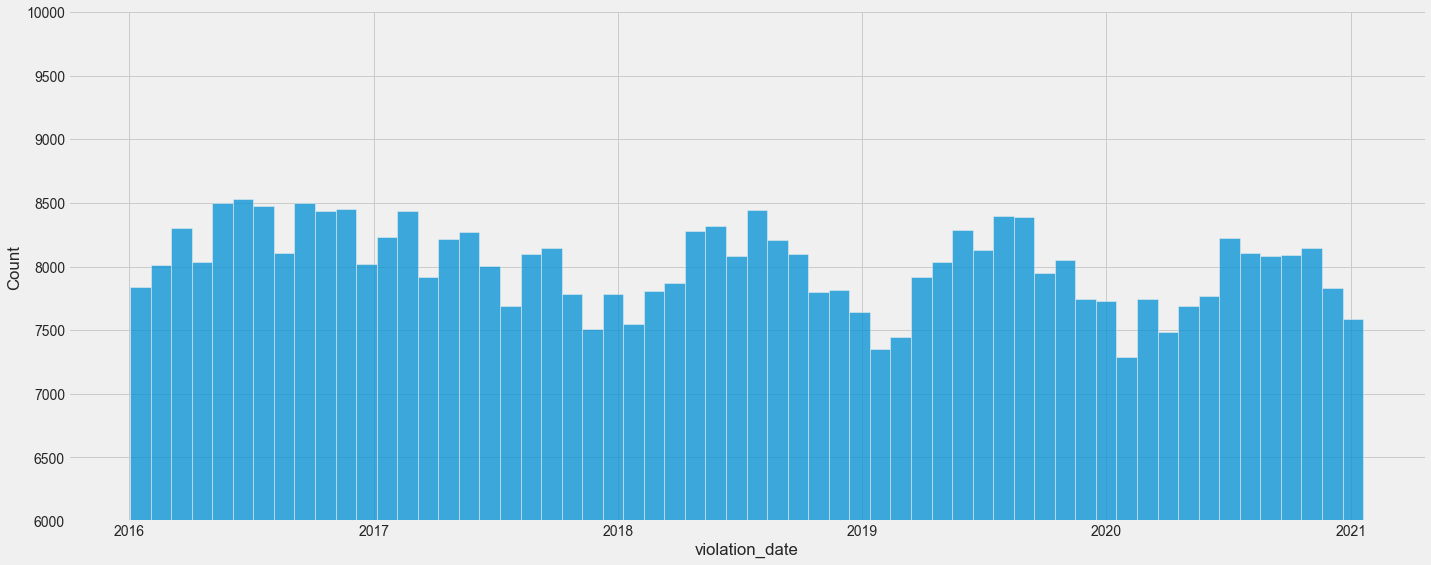

In [75]:


# lets look at a closer timeline of n cameras
month_cams = []
months = 'JanFebMarAprMayJunJulAugSepOctNovDec'
for y in range(2016, 2021):
    for m in range(1,13):
        month_cams.append([months[(m-1)*3:m*3] + "-" + str(y),
                               len(signal_df[(signal_df['year']==y) & (signal_df['month']==m)]
                                .groupby('camera_id')
                                .count()
                                .reset_index())])
month_cams = np.array(month_cams)

plt.figure(figsize=[20,8])
plt.plot([x for x in range(len(month_cams[:,1]))], month_cams[:,1].astype(np.int))
plt.xticks([x for x in range(len(month_cams[:,1]))], month_cams[:,0], rotation=90)

plt.title("Active Cameras by Month")
plt.ylim(260, 360)
plt.show()


# Now do violations per month
sns.displot(signal_df['violation_date'], 
            #kde_kws={"histtype": "step", "linewidth": 1,"alpha": 1, "color": "b"},
            bins=5*12, 
            #kde=True, 
            height=8, 
            aspect=2.5)
plt.ylim(6000, 10000)
plt.show()

Looks like we had a bunch removed in 2015, but we don't have reliable crash data for that period.
In 2016 and 2017 in particular, multiples were added/removed, thats our experiment.  

We will use intersection instead of camera_id to group our crashes and violations.

Question!!!  What are the start and end dates for each camera??? Probably need to look at each year and catch the start and end date, then label our 50+ cameras for our natural experiment.  We might not have a ton of data to work from.

Proposal:  Crashes were not recorded until 2015.  It wasn't fully mandatroy until Sept 2017 which unfortuantely is where the data is reliable.  However, we can go through every camera from 2015 to 2020 and look at the earliest date and latest date we have in the dataset.  That informs us when the camera went live or when it was shut down.  Reporting was by precinct.  The precinct is in the crash data  

Note:  In EDA, I see a lot of down time on cameras which will mess us up.  It's probably maintenance/road work/malfunction etc.  Probably need to do a check to see when camera is down.  Maybe just look at consecutive days of zero fines (maybe look as SD along with it).  Consecutive zeros can be chopped out of the dataset, or better yet... just fill in the mean for those dates.

## Crash EDA
We are interested in learning more about our crash database.  We will only be looking at crashes that occurred at an intersection.  We have 60k crashes to look at taken from about half million total.

I would like to investigate the following:
- How do red light intersections compare to all others?
- What is the most dangerous type of crash?
- What are the primary causes of crashes at red light intersections?
- Are cameras placed at most dangerous intersections

In [81]:
crash_df.columns

Index(['crash_record_id', 'rd_no', 'crash_date', 'posted_speed_limit',
       'traffic_control_device', 'device_condition', 'weather_condition',
       'lighting_condition', 'first_crash_type', 'trafficway_type',
       'alignment', 'roadway_surface_cond', 'road_defect', 'report_type',
       'crash_type', 'damage', 'prim_contributory_cause',
       'sec_contributory_cause', 'street_no', 'street_direction',
       'street_name', 'beat_of_occurrence', 'num_units', 'most_severe_injury',
       'injuries_total', 'injuries_fatal', 'injuries_incapacitating',
       'injuries_non_incapacitating', 'injuries_reported_not_evident',
       'injuries_no_indication', 'injuries_unknown', 'crash_hour',
       'crash_day_of_week', 'crash_month', 'latitude', 'longitude', 'lane_cnt',
       'intersection_related_i', 'hit_and_run_i', 'crash_date_est_i',
       'work_zone_i', 'work_zone_type', 'workers_present_i', 'intersection',
       'year', 'month', 'day', 'hour', 'region_id', 'time', 'weekday'],
   

In [83]:
crash_df.alignment.value_counts()

STRAIGHT AND LEVEL       58577
STRAIGHT ON GRADE          975
CURVE, LEVEL               363
STRAIGHT ON HILLCREST      175
CURVE ON GRADE              55
CURVE ON HILLCREST          13
Name: alignment, dtype: int64

In [76]:
all_df = pd.read_sql_query("SELECT * from all_crashes", conn)
crash_df = pd.read_sql_query("SELECT * from signal_crashes", conn)

# crash form filled out by officer (including instructions) can be found
# https://idot.illinois.gov/Assets/uploads/files/Transportation-System/Manuals-Guides-&-Handbooks/Safety/Illinois%20Traffic%20Crash%20Report%20SR%201050%20Instruction%20Manual%202019.pdf

In [77]:
# How many were at traffic signals
signal_df = all_df[all_df['traffic_control_device']=='TRAFFIC SIGNAL']
other_df = all_df[(all_df['traffic_control_device']!='TRAFFIC SIGNAL') | (all_df['intersection_related_i']!='Y')]
intrel_df = all_df[(all_df['intersection_related_i']=='Y')]
df = all_df[(all_df['intersection_related_i']=='Y')&(all_df['traffic_control_device']=='TRAFFIC SIGNAL')]

# how many crashes are at signals?
print('{:<25}{:<15}{:20}'.format('', 'n crash', 'Percent of total'))
print('{:<25}{:<15,}{:<20}'.format('All in study', len(all_df), '100.0%'))
print('{:<25}{:<15,}{:<4.1f}%'.format('At traffic signal', len(signal_df), len(signal_df)/len(all_df)*100))
print('{:<25}{:<15,}{:.1f}%'.format('Intersection-related', 
                                                    len(intrel_df), 
                                                    len(intrel_df)/len(all_df)*100
                                )
     )

print('{:<25}{:<15,}{:.1f}%'.format('Signal AND Intersection', 
                                                    len(df), 
                                                    len(df)/len(all_df)*100
                                )
     )

                         n crash        Percent of total    
All in study             461,326        100.0%              
At traffic signal        128,475        27.8%
Intersection-related     99,707         21.6%
Signal AND Intersection  60,158         13.0%


In [78]:
# what kind of crashes occur at traffic light, and how does it compare to other crashes?

def crash_stats(all_df, df):
    # by percentages
    crash_types = df['first_crash_type'].unique()

    print_list = []
    print('{:30}{:15}{:20}'.format("Type of Crash", 'Total crashes','Percent of total'))
    for crash in crash_types:
        num_crashes = len(df[df['first_crash_type']==crash])
        print_list.append([crash, num_crashes])
    
    print_list = sorted(print_list, key=lambda x: x[1], reverse=True)
    
    for crash, n in print_list: 
        print('{:30}{:<15d}{:>5.1f}%'.format(crash, n, 100 * n / len(df)))

def print_header(message):
    print('--'*20)
    print(message)
    print('--'*20)
        
def print_crash_stats(all_df, signal_df, other_df, signal_int_df):
    '''
    all_df Dataframe: all crashes in study 
    signal_df Dataframe: all signal related crashes
    other_df Dataframe: all non-signal related crahses
    signal_int_df: both signal and intersection related crashes
    '''
    print('CRASH STATS')
    print('Total crashes in study:', len(all_df))
    print('Signal crashes: {:.1f}%'.format((100 * len(signal_df) / len(all_df))))

    print_header('ALL CRASHES')
    print('Total crashes:', len(other_df))
    print()
    crash_stats(all_df, other_df)
    print('\n\n')
    
    
    print_header('CRASHES AT SIGNAL')
    print('Total crashes:', len(signal_df))
    print()
    crash_stats(all_df, signal_df)
    print('\n\n')

    
    print_header('CRASHES AT SIGNAL AND INTERSECTION RELATED')
    print('Total crashes:', len(signal_int_df))
    print()
    crash_stats(all_df, signal_int_df)
    

        

        
print_crash_stats(all_df, signal_df, other_df, df)


CRASH STATS
Total crashes in study: 461326
Signal crashes: 27.8%
----------------------------------------
ALL CRASHES
----------------------------------------
Total crashes: 401168

Type of Crash                 Total crashes  Percent of total    
PARKED MOTOR VEHICLE          105166          26.2%
REAR END                      93804           23.4%
SIDESWIPE SAME DIRECTION      63762           15.9%
TURNING                       44753           11.2%
ANGLE                         39349            9.8%
FIXED OBJECT                  20115            5.0%
PEDESTRIAN                    8165             2.0%
SIDESWIPE OPPOSITE DIRECTION  6247             1.6%
PEDALCYCLIST                  5597             1.4%
OTHER OBJECT                  4267             1.1%
HEAD ON                       3432             0.9%
REAR TO FRONT                 2370             0.6%
REAR TO SIDE                  1519             0.4%
OTHER NONCOLLISION            1481             0.4%
REAR TO REAR            

## Most dangerous crash types at intersections

Taken directly from City of Chicago website FAQs https://www.chicago.gov/city/en/depts/cdot/supp_info/red-light_cameraenforcement.html#:~:text=The%20digital%20cameras%20are%20tied,vehicle%2C%20including%20the%20license%20plate.

How are red-light camera intersections chosen?

The City reviews crash data, paying particular attention to the number of "right-angle crashes" at these intersections--indicative of accidents caused when one vehicle runs a red light and strikes another.  Only locations with a high number of right-angle crashes are chosen for red-light cameras.

I would like to verify their statement on why they chose the intersections they did.  This also could be the metric we use to verify how well the cams work.

In [86]:
for mydf in [all_df, signal_df, other_df, df]:
    mydf['injuries_total'].isna().sum()
    mydf['injuries_total'].fillna(0, inplace=True) # assume no injuries if left blank

    mydf['injuries_fatal'].isna().sum()
    mydf['injuries_fatal'].fillna(0, inplace=True) # assume no deaths if left blank

    mydf['injuries_total'] = all_df['injuries_total'].astype('int')
    mydf['injuries_fatal'] = all_df['injuries_fatal'].astype('int')


#all_df.injuries_total.sum()r


In [85]:
# what kind of crashes occur at traffic light, and how does it compare to other crashes?

def crash_stats2(df):
    # by percentages
    crash_types = df['first_crash_type'].unique()

    print_list = []
    
    
    print()
    print('{:30}{:15}{:20}{:20}{:20}{:20}'.format("Type of Crash", 'Total Crashes', 'Injuries', 'Injuries/Crash', 'Deaths', 'Deaths/Crash'))
    for crash in crash_types:
        num_crashes = len(df[df['first_crash_type']==crash])
        num_injuries = df[df['first_crash_type']==crash]['injuries_total'].sum()
        num_deaths = df[df['first_crash_type']==crash]['injuries_fatal'].sum()
        print_list.append([crash, num_crashes, num_injuries, num_deaths])
    
    print_list = sorted(print_list, key=lambda x: x[1], reverse=True)
    
    

    for crash, n, injuries, deaths in print_list: 
        print('{:30}{:<15d}{:<20}{:<20.2f}{:<20}{:<20.5f}'.format(crash, n, injuries, injuries/n, deaths, deaths/n))
    
    return print_list

def all_stats(message, df):
        print('{:30}{:<15d}{:<20}{:<20.2f}{:<20}{:<20.5f}'.format(message, 
                                                                      len(df), 
                                                                      df['injuries_total'].sum(), 
                                                                      df['injuries_total'].sum()/len(df),
                                                                      df['injuries_fatal'].sum(), 
                                                                      df['injuries_fatal'].sum()/len(df)))
        

def print_crash_stats2(all_df, signal_df, other_df, signal_int_df):
    '''
    all_df Dataframe: all crashes in study 
    signal_df Dataframe: all signal related crashes
    other_df Dataframe: all non-signal related crahses
    signal_int_df: both signal and intersection related crashes
    '''
    print('CRASH STATS')
    print()
    
   

    all_stats('ALL OTHER CRASHES', other_df)
    
    # First, we print the stats for all crashes
    crash_stats2(all_df)
    print('\n\n')
    
    print_header('CRASHES AT SIGNAL AND INTERSECTION RELATED')
    
    
    all_stats('ALL SIGNAL & INTERSECTION CRASHES', signal_int_df)

    print()
    crash_stats2(signal_int_df)
    
    

        

        
print_crash_stats2(all_df, signal_df, other_df, df)




CRASH STATS

ALL OTHER CRASHES             401168         60606               0.15                389                 0.00097             

Type of Crash                 Total Crashes  Injuries            Injuries/Crash      Deaths              Deaths/Crash        
REAR END                      110056         19563               0.18                18                  0.00016             
PARKED MOTOR VEHICLE          105591         4037                0.04                53                  0.00050             
SIDESWIPE SAME DIRECTION      70884          4609                0.07                15                  0.00021             
TURNING                       64674          14488               0.22                32                  0.00049             
ANGLE                         49035          16113               0.33                55                  0.00112             
FIXED OBJECT                  21308          4510                0.21                144                

In [110]:
print('Crashes involving signaled intersections:')
print('\t{:.1%} of all crashes'.format(len(df) / len(all_df)))
print('\t{:.1%} of all injuries'.format(df['injuries_total'].sum() / all_df['injuries_total'].sum()))
print('\t{:.1%} of all deaths'.format(df['injuries_fatal'].sum() / all_df['injuries_fatal'].sum()))
print()

Crashes involving signaled intersections:
	13.0% of all crashes
	26.4% of all injuries
	22.4% of all deaths




Type of Crash                 Total Crashes  Injuries            Injuries/Crash      Deaths              Deaths/Crash        
TURNING                       19967          6137                0.31                21                  0.00105             
REAR END                      16467          3737                0.23                5                   0.00030             
ANGLE                         9559           6501                0.68                40                  0.00418             
SIDESWIPE SAME DIRECTION      7217           555                 0.08                4                   0.00055             
PEDESTRIAN                    2734           2603                0.95                18                  0.00658             
PEDALCYCLIST                  1264           932                 0.74                5                   0.00396             
FIXED OBJECT                  1161           424                 0.37                15                  0.01292     

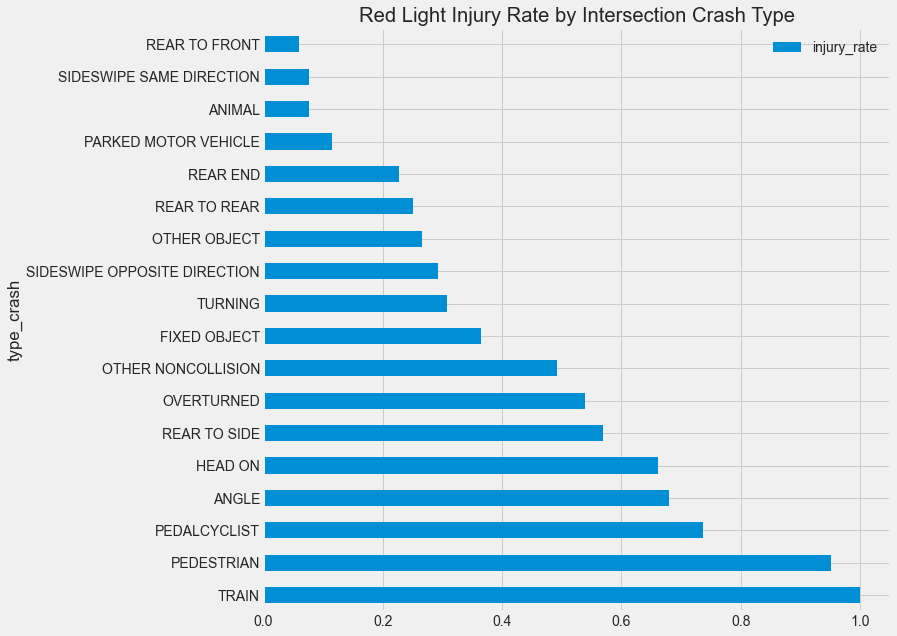

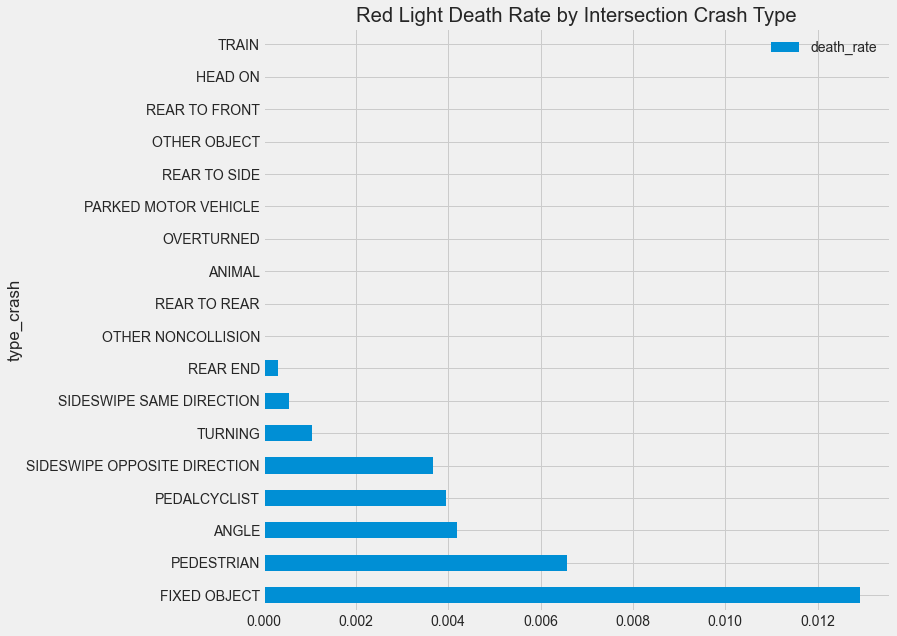

<AxesSubplot:title={'center':'Red Light Death/Injury Rate by Crash Type'}, ylabel='type_crash'>

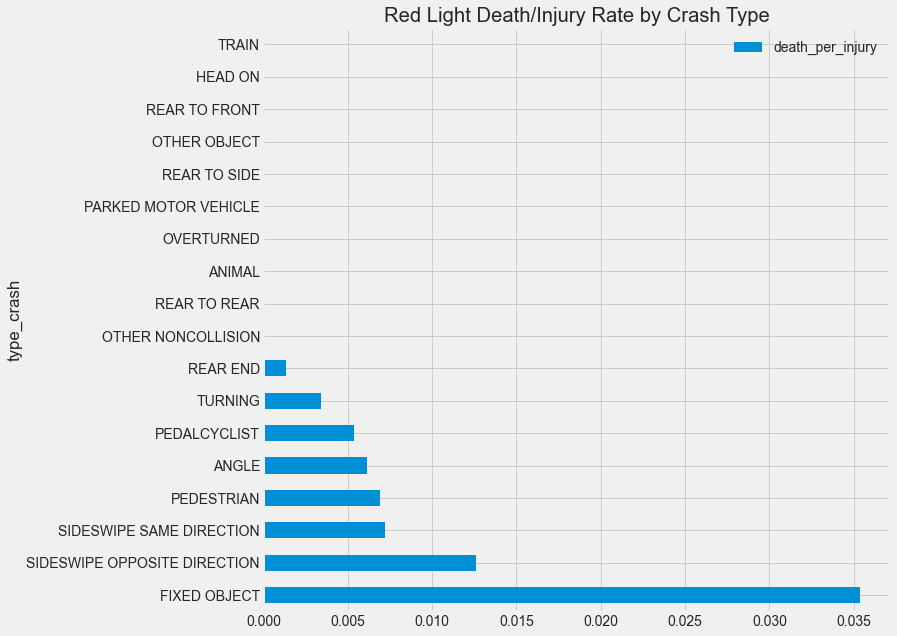

In [111]:
plot_list = crash_stats2(df)

plot_df = pd.DataFrame(plot_list, columns=['type_crash', 'n_crashes', 'injuries', 'deaths'])
plot_df['injury_rate'] = plot_df['injuries']/plot_df['n_crashes']
plot_df['death_rate'] = plot_df['deaths']/plot_df['n_crashes']
plot_df['death_per_injury'] = plot_df['deaths']/plot_df['injuries']

print()
plot_df[['type_crash','injury_rate']].sort_values(by='injury_rate',ascending=False).plot.barh(x='type_crash',
                                                                                              y='injury_rate',
                                                                                              figsize=[10,10],
                                                                                              title='Red Light Injury Rate by Intersection Crash Type',
                                                                                             )
                                                

plt.show()
plot_df[['type_crash','death_rate']].sort_values(by='death_rate',ascending=False).plot.barh(x='type_crash',
                                                                                            y='death_rate',
                                                                                            figsize=[10,10], 
                                                                                            title='Red Light Death Rate by Intersection Crash Type',
                                                                                           )

plt.show()
plot_df[['type_crash','death_per_injury']].sort_values(by='death_per_injury',ascending=False).plot.barh(x='type_crash',
                                                                                            y='death_per_injury',
                                                                                            figsize=[10,10], 
                                                                                            title='Red Light Death/Injury Rate by Crash Type',
                                                                                           )

Chicago gov website claims that red light cameras are there to decrease the rate of crashes.
Are the red light cams actually at most dangerous intersections?  

## Red light intersections vs. all Others
Chicago has 3035 traffic intersections with lights
176 have red light cams at them.
We would assume these to be the most dangerous intersections in the city.
https://www.chicago.gov/city/en/depts/cdot/provdrs/traffic_signals_andstreetlights/svcs/traffic_signals.html

In [123]:
# Get only intersections with total crashes and violations
# had to use a windowed query on this one

int_crash_violations_df = pd.read_sql_query('''
                            WITH cr AS
                               (SELECT intersection, 
                                       COUNT(crash_record_id) as total_crashes,
                                       SUM(injuries_total) as total_injuries, 
                                       SUM(injuries_fatal) as total_deaths
                               FROM signal_crashes
                               GROUP BY intersection)
                            SELECT cr.intersection, total_crashes, SUM(v.violations) as total_violations, cr.total_injuries, cr.total_deaths
                            FROM cr
                            LEFT JOIN daily_violations v
                               ON v.intersection=cr.intersection
                            GROUP BY cr.intersection
                            ORDER BY total_crashes DESC;
                           ''', conn)




In [124]:
int_crash_violations_df.head(50)

#int_crash_violations_df.total_crashes.sum()


total_intersections = 3035
total_rlc = len(int_crash_violations_df)-1
rlc_accidents = int_crash_violations_df[int_crash_violations_df['intersection'].isna()]['total_crashes'].sum()
total_accidents = int_crash_violations_df['total_crashes'].sum()
total_deaths = int_crash_violations_df.total_deaths.sum()
total_injuries = int_crash_violations_df.total_injuries.sum()
other_deaths = int_crash_violations_df[int_crash_violations_df['intersection'].isna()]['total_deaths'].sum()
other_injuries = int_crash_violations_df[int_crash_violations_df['intersection'].isna()]['total_injuries'].sum()
#print(rlc_accidents, total_accidents)

print('No red light cam intersections:')
print('{:.2%} of all red light intersections'.format(1 - total_rlc/total_intersections))
print('{:.2%} of all red light accidents'.format(rlc_accidents/total_accidents))
print('{:.2%} of all red light deaths'.format(other_deaths/total_deaths))
print('{:.2%} of all red light injuries'.format(other_injuries/total_injuries))
print('Deaths: {}  Injuries: {}'.format(other_deaths, other_injuries))


print()
print('Red light cam intersections:')
print('{:.2%} of all red light intersections'.format(total_rlc/total_intersections))
print('{:.2%} of all red light accidents'.format(1 - rlc_accidents/total_accidents))
print('{:.2%} of all red light deaths'.format(1-other_deaths/total_deaths))
print('{:.2%} of all red light injuries'.format(1 - other_injuries/total_injuries))
print('Deaths: {} Injuries: {}'.format(total_deaths-other_deaths, total_injuries-other_injuries))


No red light cam intersections:
94.04% of all red light intersections
86.10% of all red light accidents
83.64% of all red light deaths
85.60% of all red light injuries
Deaths: 92  Injuries: 18456

Red light cam intersections:
5.96% of all red light intersections
13.90% of all red light accidents
16.36% of all red light deaths
14.40% of all red light injuries
Deaths: 18 Injuries: 3106


Red light cameras exist at intersections that are more dangerous, or perhaps at least more used than typical

In [125]:
print(df.columns)
sql_fetch_tables(c, conn)

Index(['crash_record_id', 'rd_no', 'crash_date', 'posted_speed_limit',
       'traffic_control_device', 'device_condition', 'weather_condition',
       'lighting_condition', 'first_crash_type', 'trafficway_type',
       'alignment', 'roadway_surface_cond', 'road_defect', 'report_type',
       'crash_type', 'damage', 'prim_contributory_cause',
       'sec_contributory_cause', 'street_no', 'street_direction',
       'street_name', 'beat_of_occurrence', 'num_units', 'most_severe_injury',
       'injuries_total', 'injuries_fatal', 'injuries_incapacitating',
       'injuries_non_incapacitating', 'injuries_reported_not_evident',
       'injuries_no_indication', 'injuries_unknown', 'crash_hour',
       'crash_day_of_week', 'crash_month', 'latitude', 'longitude', 'lane_cnt',
       'intersection_related_i', 'hit_and_run_i', 'crash_date_est_i',
       'work_zone_i', 'work_zone_type', 'workers_present_i'],
      dtype='object')


[('int_chars',),
 ('intersection_counts',),
 ('intersection_chars',),
 ('cam_locations',),
 ('cam_startend',),
 ('daily_violations',),
 ('intersction_locations',),
 ('all_crashes',),
 ('hourly_congestion',),
 ('hourly_weather',),
 ('region_data',),
 ('intersection_cams',),
 ('signal_crashes',)]

In [126]:
type_crash = pd.read_sql_query('''
                            WITH cr AS
                               (SELECT first_crash_type as crash_type,
                                       SUM(injuries_total) as total_injuries, 
                                       SUM(injuries_fatal) as total_deaths,
                                       COUNT(crash_record_id) as total_crashes
                               FROM signal_crashes
                               GROUP BY first_crash_type)
                            SELECT cr.crash_type, cr.total_crashes, cr.total_injuries, cr.total_deaths
                            FROM cr
                            GROUP BY cr.crash_type
                            ORDER BY cr.total_crashes DESC;
                           ''', conn)

<AxesSubplot:title={'center':'Scaled Crash Data'}, ylabel='crash_type'>

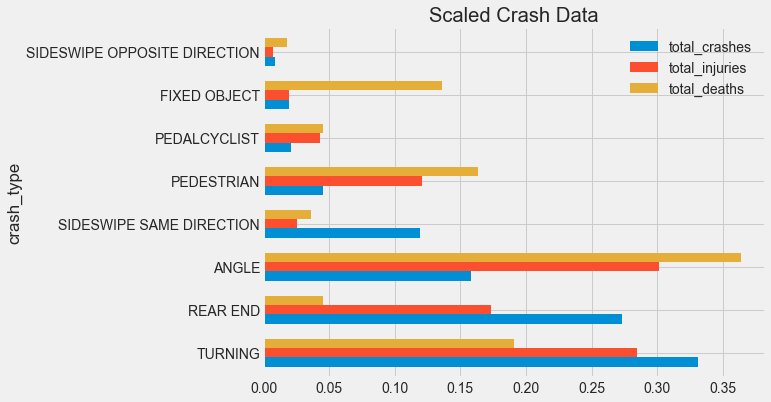

In [127]:
# USING MINMAX SCALING TO COMPARE

type_crash['total_crashes'] = type_crash['total_crashes']/type_crash.total_crashes.sum()
type_crash['total_injuries'] = type_crash['total_injuries']/type_crash.total_injuries.sum()
type_crash['total_deaths'] = type_crash['total_deaths']/type_crash.total_deaths.sum()

# Remove any crash type with no deaths
type_crash = type_crash[type_crash['total_deaths'] > 0]

type_crash.sort_values(by='total_crashes',ascending=False).plot.barh(x='crash_type', 
                                                                     figsize=[8,6], 
                                                                     title='Scaled Crash Data', 
                                                                     width=0.65
                                                                    )

## Which cams were turned one an off between 2016 and 2020 

#### Do cameras with start/end dates have common intersections?

In [147]:
# FIRST HALF OF WHAT I WANT
cams_interest = pd.read_sql_query('''SELECT camera_id, intersection, start, end
                                     FROM cam_startend ends
                                     LEFT JOIN intersection_cams ic
                                         ON ends.camera_id=ic.cam1
                                         OR ends.camera_id=ic.cam2
                                         OR ends.camera_id=ic.cam3
                                     ORDER BY intersection
                                    ''', conn)

# THIS ISN"T QUITE IT
cams_interest = pd.read_sql_query('''WITH c as
                                        (SELECT ends.camera_id as camera_id, 
                                                ic.intersection as intersection, 
                                                start, 
                                                end
                                         FROM cam_startend ends
                                         LEFT JOIN intersection_cams ic
                                             ON ends.camera_id=ic.cam1
                                             OR ends.camera_id=ic.cam2
                                             OR ends.camera_id=ic.cam3
                                         )
                                     SELECT c.camera_id, 
                                            c.intersection, 
                                            c.start, 
                                            c.end, 
                                            COUNT(cr.crash_record_id) as n_crashes, 
                                            SUM(injuries_total) as injuries_total, 
                                            SUM(injuries_fatal) as injuries_fatal
                                     FROM c
                                     LEFT JOIN signal_crashes cr
                                         ON c.intersection=cr.intersection
                                    GROUP BY c.intersection
                                    ORDER BY c.intersection
                                    ''', conn)

#TRY3
cams_interest = pd.read_sql_query('''
                                    WITH cr as
                                        (SELECT intersection,
                                                COUNT(crash_record_id) as n_crash,
                                                SUM(injuries_total) as injuries,
                                                SUM(injuries_fatal) as deaths
                                         FROM signal_crashes
                                         GROUP BY intersection
                                         ORDER BY intersection
                                         )
                                    SELECT cr.intersection, cr.n_crash, cr.injuries, cr.deaths
                                    FROM cr
                                    GROUP BY cr.intersection
                                         
                                    ''', conn)

#TRY4. Getting there
# learned that you only need one with statement (don't forget a comma between windows)
cams_interest = pd.read_sql_query('''
                                    WITH v as
                                        (SELECT intersection,
                                                sum(violations) as violations
                                        FROM daily_violations
                                        GROUP BY intersection
                                        ),
                                    cr as
                                        (SELECT intersection,
                                                COUNT(crash_record_id) as n_crash,
                                                SUM(injuries_total) as injuries,
                                                SUM(injuries_fatal) as deaths
                                         FROM signal_crashes
                                         GROUP BY intersection
                                         ORDER BY intersection
                                         )
                                    SELECT v.intersection, v.violations, cr.n_crash, cr.injuries, cr.deaths
                                    FROM v
                                    LEFT JOIN cr
                                        ON cr.intersection=v.intersection
                                    GROUP BY v.intersection
                                         
                                    ''', conn)

                          
                                        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   intersection  183 non-null    object 
 1   violations    183 non-null    int64  
 2   n_crash       181 non-null    float64
 3   injuries      181 non-null    float64
 4   deaths        181 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 7.3+ KB


<AxesSubplot:title={'center':'Most Dangerous Red Light Intersections (Scaled Percentage)'}, ylabel='intersection'>

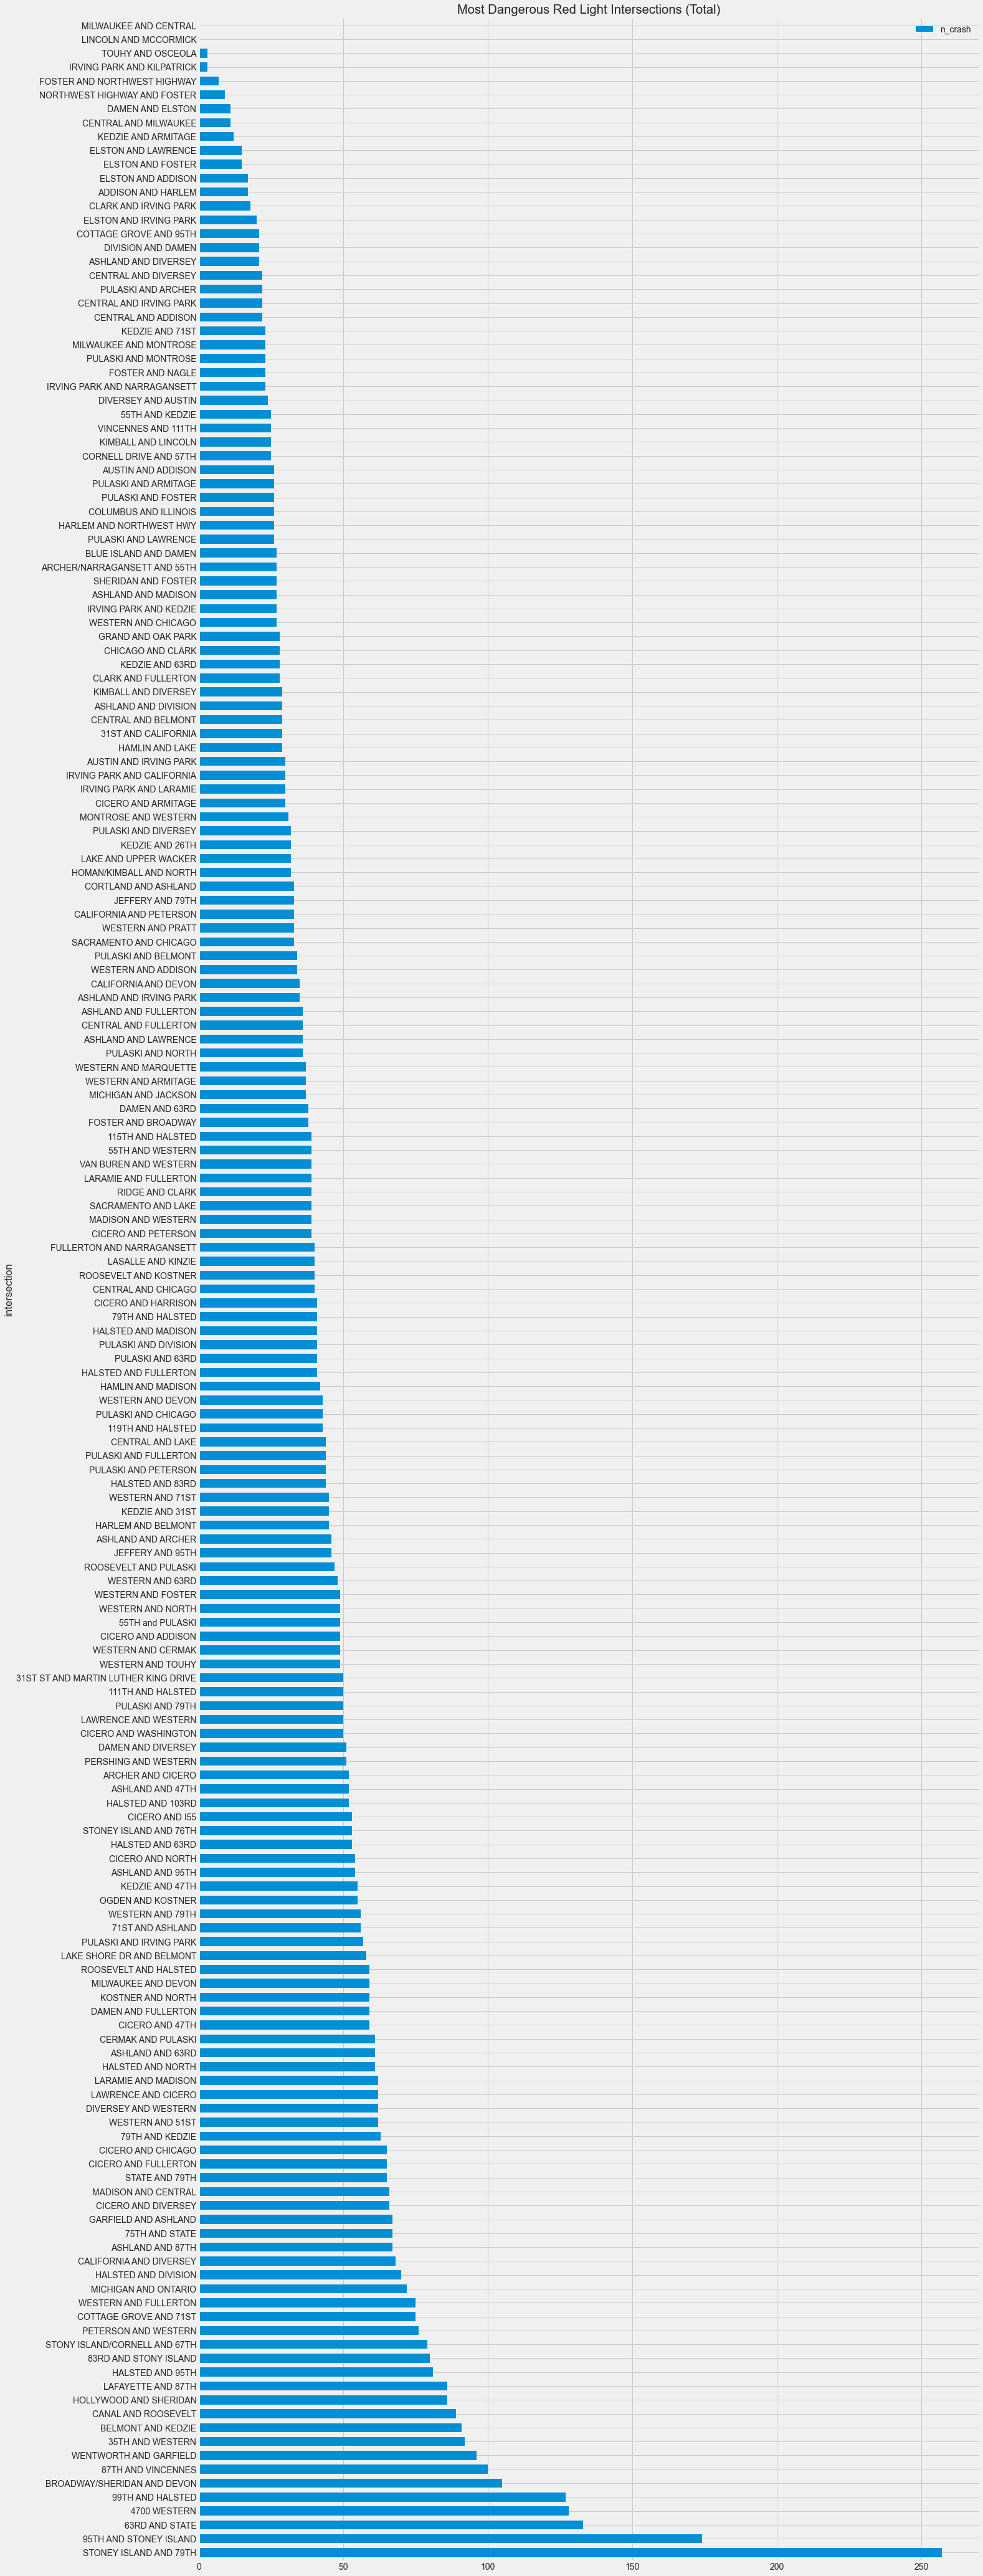

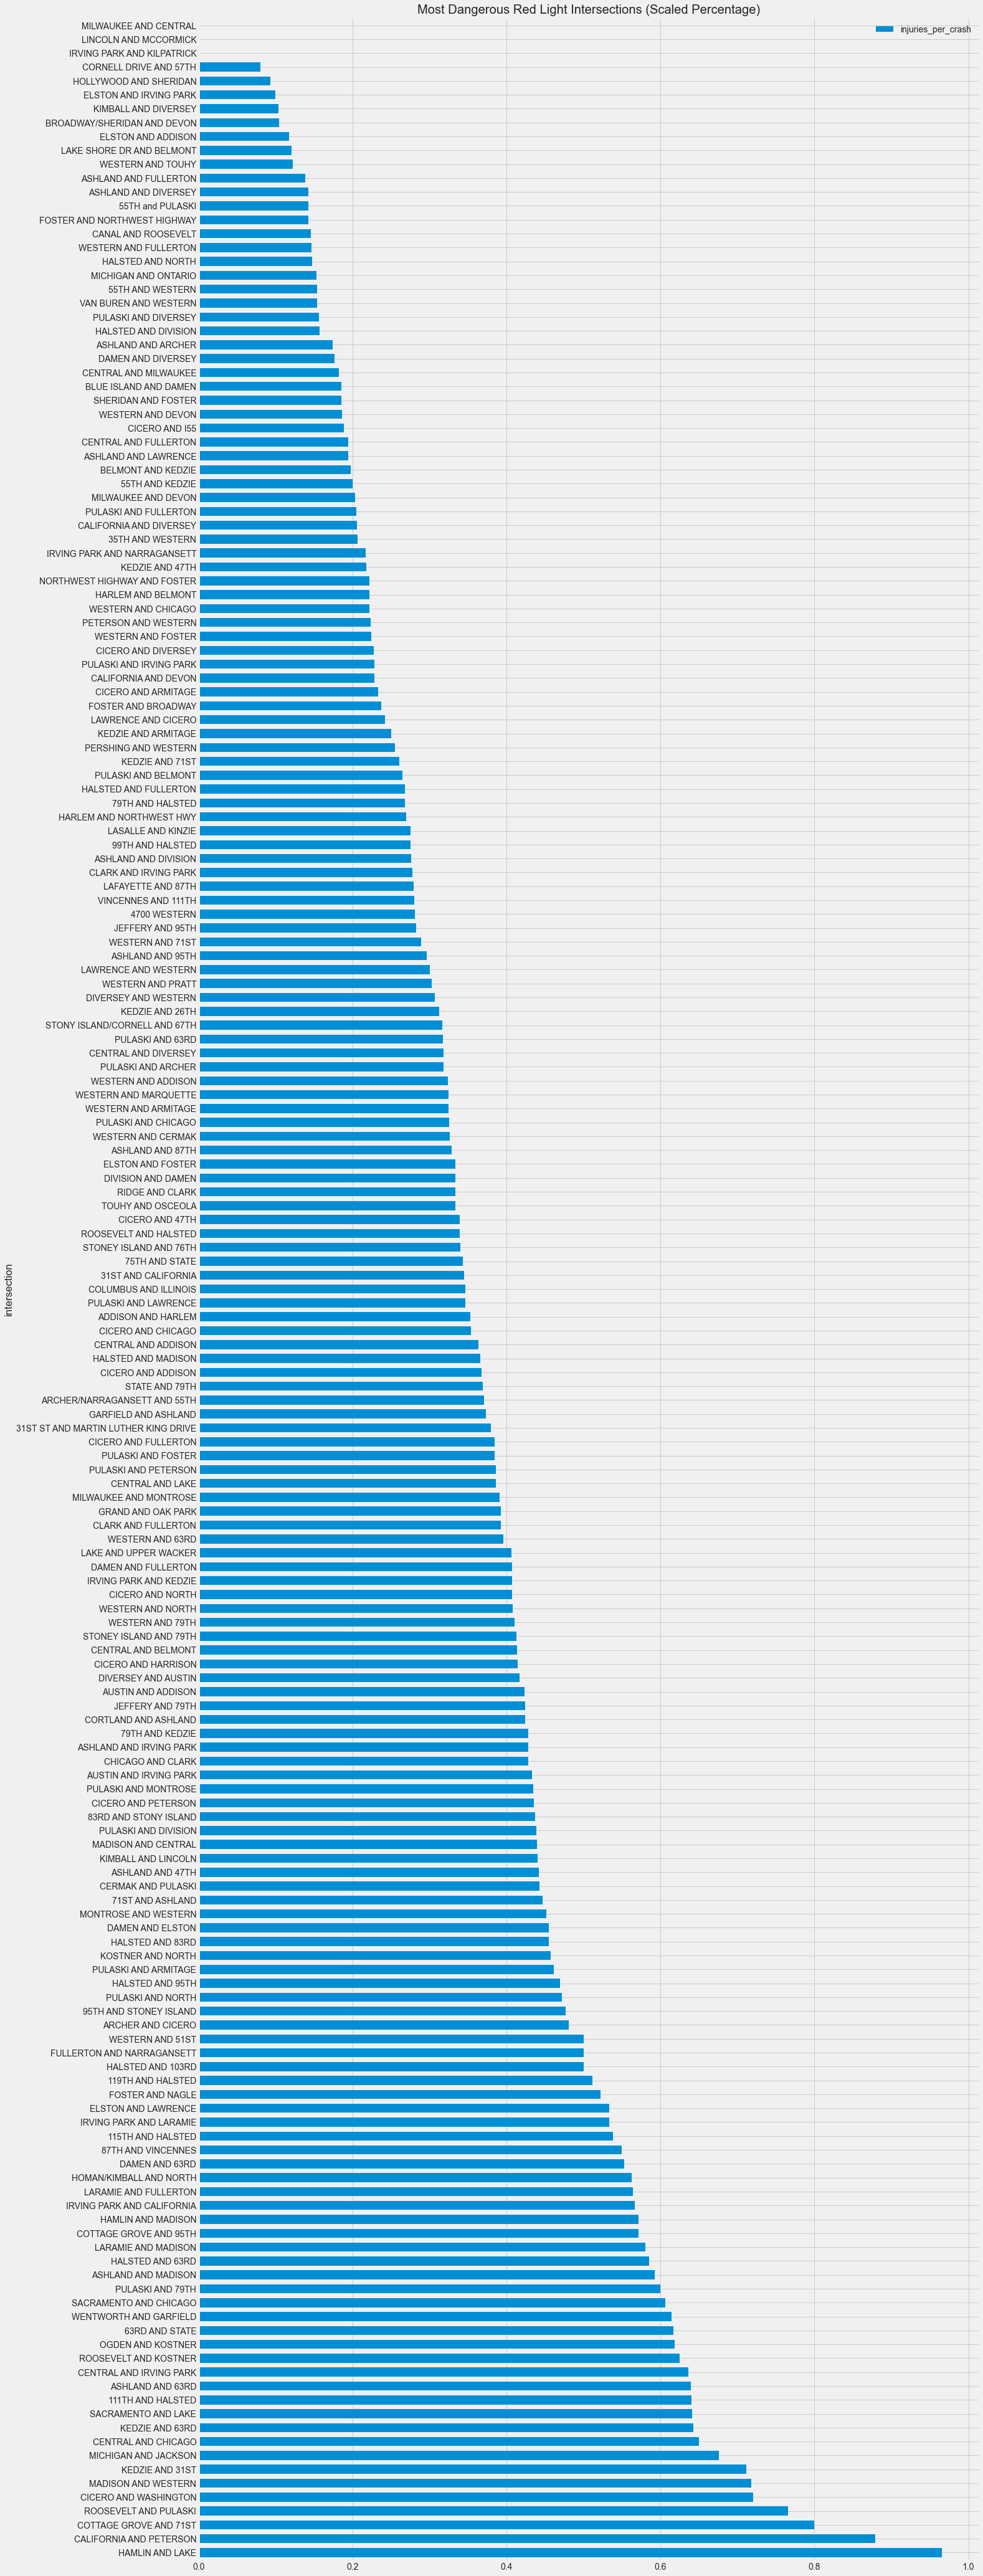

In [129]:
# Now we have every camera with every intersection with every startend
# We need to add in 

# cams_interest['start'] = pd.to_datetime(cams_interest.start)
# cams_interest['end'] = pd.to_datetime(cams_interest.end)

cams_interest.info()
cams_interest.head()

# most dangerous intersections
df_plot = cams_interest[cams_interest['intersection'].notnull()]
df_plot['injuries_per_crash'] = df_plot['injuries'] / df_plot['n_crash']
df_plot['violations'] = df_plot['violations'] / df_plot['violations'].sum()

#df_plot['n_crash'] = df_plot['n_crash'] / df_plot['n_crash'].sum()
#df_plot['injuries'] = df_plot['injuries'] / df_plot['injuries'].sum()
#df_plot['deaths'] = df_plot['deaths'] / df_plot['deaths'].sum()


df_plot[['intersection', 'n_crash']].sort_values(by='n_crash',ascending=False).plot.barh(x='intersection', 
                                                                     figsize=[20,70], 
                                                                     title='Most Dangerous Red Light Intersections (Total)', 
                                                                     width=0.65
                                                                    )

df_plot[['intersection', 'injuries_per_crash']].sort_values(by='injuries_per_crash',ascending=False).plot.barh(x='intersection', 
                                                                     figsize=[20,70], 
                                                                     title='Most Dangerous Red Light Intersections (Scaled Percentage)', 
                                                                     width=0.65
                                                                    )



In [130]:
# print(int_df[int_df['intersection'] == 'LINCOLN AND MCCORMICK'])  # OH, THAT'S WHY!!!!  WRONG LOCATION LISTED IN DATASET!!!

# # Ones that had no accidents but checked out (TOUHY AND OSCEOLA, )
# correct_camlocs = {'WENTWORTH AND GARFIELD': (41.79435532184194, -87.63114616279303),
#                    'KIMBALL AND LINCOLN': (41.99454797825689, -87.71403619467101),
#                     'IRVING PARK AND LARAMIE': (41.95330280770521, -87.75714705140294),
#                    'IRVING PARK AND KILPATRICK': (41.953454972337305, -87.74460631799197),
#                    '31ST ST AND MARTIN LUTHER KING DRIVE':(41.838438059816816, -87.61731906497867),
#                    '31ST AND CALIFORNIA':(41.83743605501678, -87.6950324427879),
#                    'ELSTON AND LAWRENCE': (41.96809435761252, -87.74010862196117),
#                    'OGDEN AND KOSTNER':(41.84767736575193, -87.73437725628261),
#                     'IRVING PARK AND CALIFORNIA':(41.95399037931945, -87.69821479681646),
#                    'LAKE SHORE DR AND BELMONT': (41.940128786177176, -87.63954362976928),
#                      }

# int_df.intersection.unique()



In [131]:
cams_interest.deaths.sum()  # it matches previous result.  This is all deaths though.
cams_interest.injuries.sum() # 3041 total injuries from rlc

3106.0

In [132]:
sql_fetch_tables(c, conn)

[('int_chars',),
 ('intersection_counts',),
 ('intersection_chars',),
 ('cam_locations',),
 ('cam_startend',),
 ('daily_violations',),
 ('intersction_locations',),
 ('all_crashes',),
 ('hourly_congestion',),
 ('hourly_weather',),
 ('region_data',),
 ('intersection_cams',),
 ('signal_crashes',)]

# Weather EDA

In [134]:
wx_df = pd.read_sql_query('''SELECT * 
                                  FROM hourly_weather
                                  WHERE year > 2015
                                  ''', conn)

# Congestion EDA

In [138]:
congestion_df = pd.read_sql_query('''SELECT * 
                                  FROM hourly_congestion
                                  WHERE year > 2015
                                  ''', conn)


In [140]:
print('Total potential wx entries:', len(weather_df) * 29)  # if every weather entry had every region
print('Total congestion entries:', len(congestion_df))
print()

for year in range(2015, 2021):
    print(year, 'traffic entries:', len(congestion_df[congestion_df['year']==year]))
    print(year, 'weather entries:', len(wx_df[wx_df['year']==year]) * 29)
    print()
    

# we have more wx data than congestion.  Consider dropping 2015?
# it makes sense to have slightly more weather entries.  
# Not all regions have buses running 24/7.  Could also have missing data

Total potential wx entries: 1504752
Total congestion entries: 1242940

2015 traffic entries: 0
2015 weather entries: 0

2016 traffic entries: 250473
2016 weather entries: 254736

2017 traffic entries: 251517
2017 weather entries: 254040

2018 traffic entries: 248965
2018 weather entries: 254040

2019 traffic entries: 242208
2019 weather entries: 254040

2020 traffic entries: 249777
2020 weather entries: 233856



In [141]:
# clean up congestion to fill in the missing overnight data with mean
congestion_df.speed.isna().sum()

print('Congestion rows with speed of zero: {:.2f}%'.format(congestion_df[congestion_df['speed']==0].count()[0] / len(congestion_df) * 100))



def speed_fix(speed, hour):
    # there is no significant congestion before 5am in Chicago.
    # there are however a significant amount of buses sitting still before starting routes
    if speed < 20 and 0 < hour < 5 or speed > 50:
        return 28
    else:
        return speed

#congestion_df.speed.replace(0, congestion_df.speed.mean(), inplace=True)
# takes a few minutes to fix the speed discrepancy  

############### MOVE ME TO PREPROCESSING  ######################
congestion_df['speed'] = congestion_df.apply(lambda x: speed_fix(x.speed, x.hour), axis=1)

Congestion rows with speed of zero: 0.00%


In [142]:
congestion_df.columns

Index(['year', 'month', 'day', 'hour', 'region_id', 'bus_count', 'num_reads',
       'speed', 'weekday'],
      dtype='object')

In [143]:
hourly_congestion = congestion_df.drop(['region_id'], axis=1).groupby(['year', 'month', 'day', 'hour', 'weekday']).agg({'bus_count':'sum', 'num_reads':'sum', 'speed':np.mean}).reset_index()

<AxesSubplot:xlabel='year'>

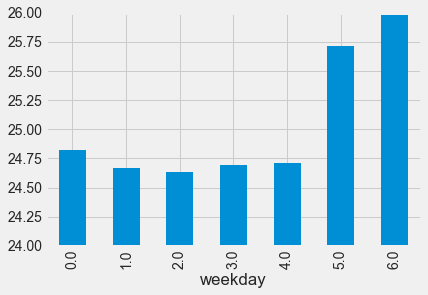

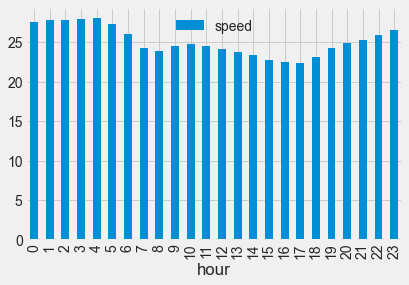

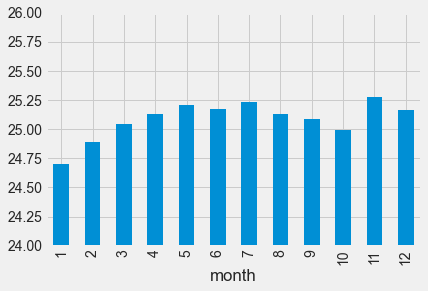

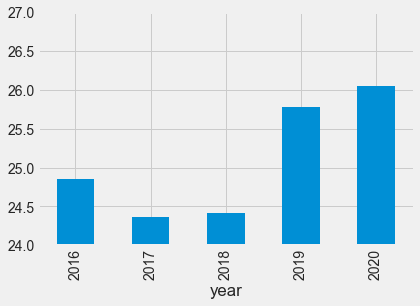

In [144]:
hourly_congestion[['weekday', 'speed']].groupby('weekday').mean().plot.bar(legend=False, ylim=[24,26])
hourly_congestion[['hour', 'speed']].groupby('hour').mean().plot.bar()
hourly_congestion[['month', 'speed']].groupby('month').mean().plot.bar(legend=False, ylim=[24,26])
hourly_congestion[['year', 'speed']].groupby('year').mean().plot.bar(legend=False, ylim=[24,27])


Holidays could be a consideration.  Look at Nov/Dec.

<AxesSubplot:xlabel='region_id'>

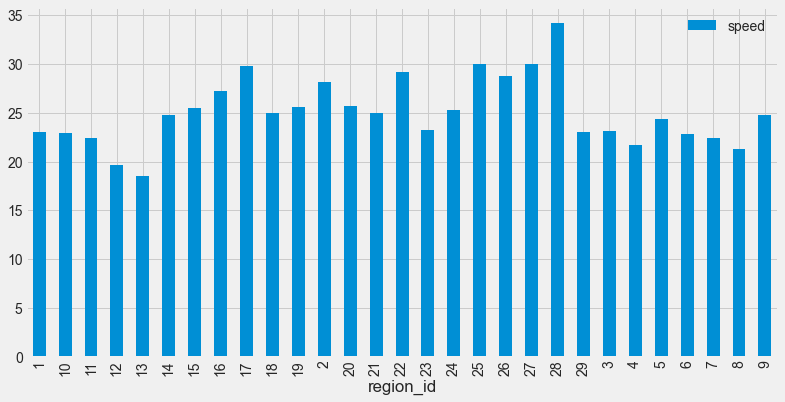

In [146]:
region_congestion = congestion_df.groupby(['region_id']).agg({'speed':np.mean}).reset_index()
region_congestion.plot.bar('region_id', figsize=[12, 6])



Looking at the mean speed by region, we see that we have to account for region if we use congestion. 
We will probably have to scale it by region so we can fairly compare and use congestion/speed in our model.  Check if we added region_id